In [25]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dtt
import matplotlib.pyplot as plt

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

In [5]:
week_nums_2020 = [200104, 200111, 200118, 200125, 200201, 200208, 
                  200215, 200222, 200229, 200307, 200314, 200321, 
                  200328, 200404, 200411, 200418, 200425, 200502, 
                  200509, 200516, 200523, 200530, 200606, 200613, 
                  200620, 200627]
week_nums_2019 = [190105, 190112, 190119, 190126, 190202, 190209, 
                  190216, 190223, 190302, 190309, 190316, 190323, 
                  190330, 190406, 190413, 190420, 190427, 190504, 
                  190511, 190518, 190525, 190601, 190608, 190615, 
                  190622, 190629]
week_nums_2018 = [180106, 180113, 180120, 180127, 180203, 180210, 
                  180217, 180224, 180303, 180310, 180317, 180324, 
                  180331, 180407, 180414, 180421, 180428, 180505, 
                  180512, 180519, 180526, 180602, 180609, 180616, 
                  180623, 180630]


# NO GROUPBY LINENAME

In [15]:
def cleaned_zeros_yearly_data(week_nums):
    df = get_data(week_nums)
    
    # create df with only stations focusing on
    df_stations = df[(df.STATION == 'TIMES SQ-42 ST')
                     |(df.STATION == 'GRD CNTRL-42 ST')
                     |(df.STATION == 'LEXINGTON AV/53')
                     |(df.STATION == '34 ST-HERALD SQ')
                     |(df.STATION == '14 ST-UNION SQ')
                     |(df.STATION == '59 ST COLUMBUS')
                     |(df.STATION == '34 ST-PENN STA')]

    # clean data
    df_stations['DATE'] = pd.to_datetime(df_stations['DATE'])
    df_stations['TIME'] = pd.to_datetime(df_stations['TIME'])
    df_stations.rename(columns={df_stations.columns[10]: 'EXITS'}
                            , inplace=True)

    # get the daily summary data of each turnstile
#    daily_sum_stations = df_stations.groupby(
#        ['C/A', 'UNIT', 'SCP', 'LINENAME', 'STATION','DATE']).agg(
#        {'ENTRIES': lambda ENTIRES : ENTIRES.max() - ENTIRES.min(),
#         'EXITS': lambda EXITS: EXITS.max() - EXITS.min()}).reset_index()
    
    # get the daily summary data of station
#    daily_sum_stations = daily_sum_stations.groupby(
#        ['STATION','DATE'])[['ENTRIES','EXITS']].sum().reset_index()
    
    # get the fist day of the week & place in new 'WeekOf' column
#    daily_sum_stations['weekday'] = daily_sum_stations['DATE'].dt.dayofweek
#    daily_sum_stations['WeekOf'] = daily_sum_stations['DATE']
#    daily_sum_stations.loc[daily_sum_stations.weekday != 0, 'WeekOf'] = ''
#    daily_sum_stations = daily_sum_stations.replace('',np.nan).ffill()
#    daily_sum_stations['WeekOf'] = pd.to_datetime(daily_sum_stations['WeekOf']).dt.date
    
    # get total Traffic (= entries + exits) & place in new 'TotalTraffic' column
#    daily_sum_stations['TotalTraffic'] = daily_sum_stations['ENTRIES'] + daily_sum_stations['EXITS']
    
    
    return df_stations

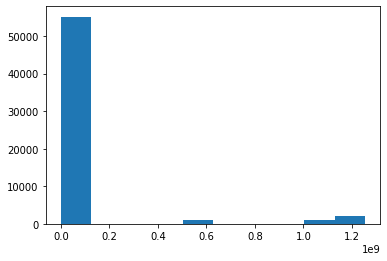

In [76]:
plt.hist(cp_test[(cp_test.STATION == '34 ST-HERALD SQ')].ENTRIES);

In [74]:
cp_test[(cp_test.STATION == '34 ST-HERALD SQ')].ENTRIES.value_counts()

0             1113
552544448       67
9752932         51
552544502       46
1043617501      42
              ... 
516505           1
512912           1
13839247         1
734092           1
15560845         1
Name: ENTRIES, Length: 53786, dtype: int64

In [69]:
cp_test[(cp_test.STATION == '34 ST-HERALD SQ')].ENTRIES.value_counts()

0             1113
552544448       67
9752932         51
552544502       46
1043617501      42
              ... 
516505           1
512912           1
13839247         1
734092           1
15560845         1
Name: ENTRIES, Length: 53786, dtype: int64

In [32]:
cp_test[cp_test.ENTRIES == 0]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
99199,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2019-12-28,2020-07-02 03:00:00,REGULAR,0,3103
99200,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2019-12-28,2020-07-02 07:00:00,REGULAR,0,3103
99201,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2019-12-28,2020-07-02 11:00:00,REGULAR,0,3103
99202,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2019-12-28,2020-07-02 15:00:00,REGULAR,0,3103
99203,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2019-12-28,2020-07-02 19:00:00,REGULAR,0,3103
...,...,...,...,...,...,...,...,...,...,...,...
99410,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2020-06-26,2020-07-02 04:00:00,REGULAR,0,3152
99411,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2020-06-26,2020-07-02 08:00:00,REGULAR,0,3152
99412,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2020-06-26,2020-07-02 12:00:00,REGULAR,0,3152
99413,N506,R022,00-06-01,34 ST-HERALD SQ,BDFMNQRW,IND,2020-06-26,2020-07-02 16:00:00,REGULAR,0,3152


In [30]:
cp_test.shape

(427225, 11)

In [24]:
cp_test = cleaned_zeros_yearly_data(week_nums_2020)

In [ ]:
cp

In [33]:
def get_yearly_data(week_nums):
    df = get_data(week_nums)
    
    # create df with only stations focusing on
    df_stations = df[(df.STATION == 'TIMES SQ-42 ST')
                     |(df.STATION == 'GRD CNTRL-42 ST')
                     |(df.STATION == 'LEXINGTON AV/53')
                     |(df.STATION == '34 ST-HERALD SQ')
                     |(df.STATION == '14 ST-UNION SQ')
                     |(df.STATION == '59 ST COLUMBUS')
                     |(df.STATION == '34 ST-PENN STA')]

    # clean data
    df_stations['DATE'] = pd.to_datetime(df_stations['DATE'])
    df_stations['TIME'] = pd.to_datetime(df_stations['TIME'])
    df_stations.rename(columns={df_stations.columns[10]: 'EXITS'}
                            , inplace=True)

    # get the daily summary data of each turnstile
    daily_sum_stations = df_stations.groupby(
        ['C/A', 'UNIT', 'SCP', 'LINENAME', 'STATION','DATE']).agg(
        {'ENTRIES': lambda ENTIRES : ENTIRES.max() - ENTIRES.min(),
         'EXITS': lambda EXITS: EXITS.max() - EXITS.min()}).reset_index()
    
    # get the daily summary data of station
    daily_sum_stations = daily_sum_stations.groupby(
        ['STATION','DATE'])[['ENTRIES','EXITS']].sum().reset_index()
    
    # get the fist day of the week & place in new 'WeekOf' column
    daily_sum_stations['weekday'] = daily_sum_stations['DATE'].dt.dayofweek
    daily_sum_stations['WeekOf'] = daily_sum_stations['DATE']
    daily_sum_stations.loc[daily_sum_stations.weekday != 0, 'WeekOf'] = ''
    daily_sum_stations = daily_sum_stations.replace('',np.nan).ffill()
    daily_sum_stations['WeekOf'] = pd.to_datetime(daily_sum_stations['WeekOf']).dt.date
    
    # get total Traffic (= entries + exits) & place in new 'TotalTraffic' column
    daily_sum_stations['TotalTraffic'] = daily_sum_stations['ENTRIES'] + daily_sum_stations['EXITS']
    
    
    return daily_sum_stations


In [35]:
stations_2020 = get_yearly_data(week_nums_2020)

In [49]:
stations_2020[stations_2020.STATION == '14 ST-UNION SQ']

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic
0,14 ST-UNION SQ,2019-12-28,45068,52230,5,NaT,97298
1,14 ST-UNION SQ,2019-12-29,36281,42165,6,NaT,78446
2,14 ST-UNION SQ,2019-12-30,57899,65968,0,2019-12-30,123867
3,14 ST-UNION SQ,2019-12-31,55468,59503,1,2019-12-30,114971
4,14 ST-UNION SQ,2020-01-01,30936,33736,2,2019-12-30,64672
...,...,...,...,...,...,...,...
177,14 ST-UNION SQ,2020-06-22,12293,15249,0,2020-06-22,27542
178,14 ST-UNION SQ,2020-06-23,12776,15857,1,2020-06-22,28633
179,14 ST-UNION SQ,2020-06-24,13598,17062,2,2020-06-22,30660
180,14 ST-UNION SQ,2020-06-25,13689,17015,3,2020-06-22,30704


In [26]:
stations_2019 = get_yearly_data(week_nums_2019)

In [27]:
stations_2018 = get_yearly_data(week_nums_2018)

# FULTON ST

In [17]:
def fulton_yearly_data(week_nums):
    df = get_data(week_nums)
    
    # create df with only stations focusing on
    df_stations = df[(df.STATION == "FULTON ST")]

    # clean data
    df_stations['DATE'] = pd.to_datetime(df_stations['DATE'])
    df_stations['TIME'] = pd.to_datetime(df_stations['TIME'])
    df_stations.rename(columns={df_stations.columns[10]: 'EXITS'}
                            , inplace=True)

    # get the daily summary data of each turnstile
    daily_sum_stations = df_stations.groupby(
        ['C/A', 'UNIT', 'SCP', 'LINENAME', 'STATION','DATE']).agg(
        {'ENTRIES': lambda ENTIRES : ENTIRES.max() - ENTIRES.min(),
         'EXITS': lambda EXITS: EXITS.max() - EXITS.min()}).reset_index()
    
    # get the lines we need for "FULTON ST"
    daily_sum_stations = daily_sum_stations[(daily_sum_stations.LINENAME == 'ACJZ2345')
                                     |(daily_sum_stations.LINENAME == '2345ACJZ')]
    
    # get the daily summary data of station
    daily_sum_stations = daily_sum_stations.groupby(
        ['STATION','DATE'])[['ENTRIES','EXITS']].sum().reset_index()
    
    # get the fist day of the week & place in new 'WeekOf' column
    daily_sum_stations['weekday'] = daily_sum_stations['DATE'].dt.dayofweek
    daily_sum_stations['WeekOf'] = daily_sum_stations['DATE']
    daily_sum_stations.loc[daily_sum_stations.weekday != 0, 'WeekOf'] = ''
    daily_sum_stations = daily_sum_stations.replace('',np.nan).ffill()
    daily_sum_stations['WeekOf'] = pd.to_datetime(daily_sum_stations['WeekOf']).dt.date
    
    # get total Traffic (= entries + exits) & place in new 'TotalTraffic' column
    daily_sum_stations['TotalTraffic'] = daily_sum_stations['ENTRIES'] + daily_sum_stations['EXITS']
    
    
    return daily_sum_stations

In [19]:
fulton_yearly_data(week_nums_2020)

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic
0,FULTON ST,2019-12-28,39118,35614,5,NaT,74732
1,FULTON ST,2019-12-29,31262,28259,6,NaT,59521
2,FULTON ST,2019-12-30,66654,60949,0,2019-12-30,127603
3,FULTON ST,2019-12-31,60617,55373,1,2019-12-30,115990
4,FULTON ST,2020-01-01,29312,26114,2,2019-12-30,55426
...,...,...,...,...,...,...,...
177,FULTON ST,2020-06-22,10261,11701,0,2020-06-22,21962
178,FULTON ST,2020-06-23,10676,12313,1,2020-06-22,22989
179,FULTON ST,2020-06-24,11329,13071,2,2020-06-22,24400
180,FULTON ST,2020-06-25,11407,13272,3,2020-06-22,24679


In [28]:
fulton_2020 = fulton_yearly_data(week_nums_2020)

In [20]:
fulton_yearly_data(week_nums_2019)

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic
0,FULTON ST,2018-12-29,43291,34543,5,NaT,77834
1,FULTON ST,2018-12-30,34044,27424,6,NaT,61468
2,FULTON ST,2018-12-31,53489,45492,0,2018-12-31,98981
3,FULTON ST,2019-01-01,28061,22910,1,2018-12-31,50971
4,FULTON ST,2019-01-02,80229,69518,2,2018-12-31,149747
...,...,...,...,...,...,...,...
177,FULTON ST,2019-06-24,90912,80800,0,2019-06-24,171712
178,FULTON ST,2019-06-25,92927,82561,1,2019-06-24,175488
179,FULTON ST,2019-06-26,94481,84557,2,2019-06-24,179038
180,FULTON ST,2019-06-27,95547,86124,3,2019-06-24,181671


In [29]:
fulton_2019 = fulton_yearly_data(week_nums_2019)

In [21]:
fulton_yearly_data(week_nums_2018)

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic
0,FULTON ST,2017-12-30,35219,26382,5,NaT,61601
1,FULTON ST,2017-12-31,29373,21905,6,NaT,51278
2,FULTON ST,2018-01-01,25728,18490,0,2018-01-01,44218
3,FULTON ST,2018-01-02,80259,66711,1,2018-01-01,146970
4,FULTON ST,2018-01-03,174103,431895,2,2018-01-01,605998
...,...,...,...,...,...,...,...
177,FULTON ST,2018-06-25,91035,76498,0,2018-06-25,167533
178,FULTON ST,2018-06-26,93689,79586,1,2018-06-25,173275
179,FULTON ST,2018-06-27,93973,80219,2,2018-06-25,174192
180,FULTON ST,2018-06-28,94566,79253,3,2018-06-25,173819


In [30]:
fulton_2018 = fulton_yearly_data(week_nums_2018)

# CHAMBERS ST

In [18]:
def chambers_yearly_data(week_nums):
    df = get_data(week_nums)
    
    # create df with only stations focusing on
    df_stations = df[(df.STATION == "CHAMBERS ST")]

    # clean data
    df_stations['DATE'] = pd.to_datetime(df_stations['DATE'])
    df_stations['TIME'] = pd.to_datetime(df_stations['TIME'])
    df_stations.rename(columns={df_stations.columns[10]: 'EXITS'}
                            , inplace=True)

    # get the daily summary data of each turnstile
    daily_sum_stations = df_stations.groupby(
        ['C/A', 'UNIT', 'SCP', 'LINENAME', 'STATION','DATE']).agg(
        {'ENTRIES': lambda ENTIRES : ENTIRES.max() - ENTIRES.min(),
         'EXITS': lambda EXITS: EXITS.max() - EXITS.min()}).reset_index()
    
    # get the lines we need for "CHAMBERS ST"
    daily_sum_stations = daily_sum_stations[(daily_sum_stations.LINENAME == 'JZ456')
                                     |(daily_sum_stations.LINENAME == 'ACE23')]
    
    # get the daily summary data of station
    daily_sum_stations = daily_sum_stations.groupby(
        ['STATION','DATE'])[['ENTRIES','EXITS']].sum().reset_index()
    
    # get the fist day of the week & place in new 'WeekOf' column
    daily_sum_stations['weekday'] = daily_sum_stations['DATE'].dt.dayofweek
    daily_sum_stations['WeekOf'] = daily_sum_stations['DATE']
    daily_sum_stations.loc[daily_sum_stations.weekday != 0, 'WeekOf'] = ''
    daily_sum_stations = daily_sum_stations.replace('',np.nan).ffill()
    daily_sum_stations['WeekOf'] = pd.to_datetime(daily_sum_stations['WeekOf']).dt.date
    
    # get total Traffic (= entries + exits) & place in new 'TotalTraffic' column
    daily_sum_stations['TotalTraffic'] = daily_sum_stations['ENTRIES'] + daily_sum_stations['EXITS']
    
    
    return daily_sum_stations

In [22]:
chambers_yearly_data(week_nums_2020)

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic
0,CHAMBERS ST,2019-12-28,13385,18211,5,NaT,31596
1,CHAMBERS ST,2019-12-29,9151,13793,6,NaT,22944
2,CHAMBERS ST,2019-12-30,25827,23222,0,2019-12-30,49049
3,CHAMBERS ST,2019-12-31,23449,24350,1,2019-12-30,47799
4,CHAMBERS ST,2020-01-01,8357,11495,2,2019-12-30,19852
...,...,...,...,...,...,...,...
177,CHAMBERS ST,2020-06-22,3611,3744,0,2020-06-22,7355
178,CHAMBERS ST,2020-06-23,4036,4288,1,2020-06-22,8324
179,CHAMBERS ST,2020-06-24,4117,4352,2,2020-06-22,8469
180,CHAMBERS ST,2020-06-25,4270,4558,3,2020-06-22,8828


In [31]:
chambers_2020 = chambers_yearly_data(week_nums_2020)

In [23]:
chambers_yearly_data(week_nums_2019)

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic
0,CHAMBERS ST,2018-12-29,15416,20580,5,NaT,35996
1,CHAMBERS ST,2018-12-30,10659,15654,6,NaT,26313
2,CHAMBERS ST,2018-12-31,19684,19728,0,2018-12-31,39412
3,CHAMBERS ST,2019-01-01,8560,12461,1,2018-12-31,21021
4,CHAMBERS ST,2019-01-02,34495,28351,2,2018-12-31,62846
...,...,...,...,...,...,...,...
177,CHAMBERS ST,2019-06-24,35831,29920,0,2019-06-24,65751
178,CHAMBERS ST,2019-06-25,36933,30282,1,2019-06-24,67215
179,CHAMBERS ST,2019-06-26,37296,31711,2,2019-06-24,69007
180,CHAMBERS ST,2019-06-27,37566,32116,3,2019-06-24,69682


In [32]:
chambers_2019 = chambers_yearly_data(week_nums_2019)

In [24]:
chambers_yearly_data(week_nums_2018)

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic
0,CHAMBERS ST,2017-12-30,10412,14582,5,NaT,24994
1,CHAMBERS ST,2017-12-31,7984,12338,6,NaT,20322
2,CHAMBERS ST,2018-01-01,7831,10081,0,2018-01-01,17912
3,CHAMBERS ST,2018-01-02,34932,26691,1,2018-01-01,61623
4,CHAMBERS ST,2018-01-03,39708,29284,2,2018-01-01,68992
...,...,...,...,...,...,...,...
177,CHAMBERS ST,2018-06-25,36881,29621,0,2018-06-25,66502
178,CHAMBERS ST,2018-06-26,39684,32078,1,2018-06-25,71762
179,CHAMBERS ST,2018-06-27,38758,30479,2,2018-06-25,69237
180,CHAMBERS ST,2018-06-28,37421,30056,3,2018-06-25,67477


In [33]:
chambers_2018 = chambers_yearly_data(week_nums_2018)

# BY YEAR

In [42]:
df_2020 = pd.concat([stations_2020,fulton_2020,chambers_2020])
df_2020['Year'] = '2020'
df_2019 = pd.concat([stations_2019,fulton_2019,chambers_2019])
df_2019['Year'] = '2019'
df_2018 = pd.concat([stations_2018,fulton_2018,chambers_2018])
df_2018['Year'] = '2018'

In [43]:
df_2020

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic,Year
0,14 ST-UNION SQ,2019-12-28,45068,52230,5,NaT,97298,2020
1,14 ST-UNION SQ,2019-12-29,36281,42165,6,NaT,78446,2020
2,14 ST-UNION SQ,2019-12-30,57899,65968,0,2019-12-30,123867,2020
3,14 ST-UNION SQ,2019-12-31,55468,59503,1,2019-12-30,114971,2020
4,14 ST-UNION SQ,2020-01-01,30936,33736,2,2019-12-30,64672,2020
...,...,...,...,...,...,...,...,...
177,CHAMBERS ST,2020-06-22,3611,3744,0,2020-06-22,7355,2020
178,CHAMBERS ST,2020-06-23,4036,4288,1,2020-06-22,8324,2020
179,CHAMBERS ST,2020-06-24,4117,4352,2,2020-06-22,8469,2020
180,CHAMBERS ST,2020-06-25,4270,4558,3,2020-06-22,8828,2020


In [44]:
df_2019

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic,Year
0,14 ST-UNION SQ,2018-12-29,53095,58799,5,NaT,111894,2019
1,14 ST-UNION SQ,2018-12-30,42082,47900,6,NaT,89982,2019
2,14 ST-UNION SQ,2018-12-31,52430,51727,0,2018-12-31,104157,2019
3,14 ST-UNION SQ,2019-01-01,31859,32006,1,2018-12-31,63865,2019
4,14 ST-UNION SQ,2019-01-02,75240,72300,2,2018-12-31,147540,2019
...,...,...,...,...,...,...,...,...
177,CHAMBERS ST,2019-06-24,35831,29920,0,2019-06-24,65751,2019
178,CHAMBERS ST,2019-06-25,36933,30282,1,2019-06-24,67215,2019
179,CHAMBERS ST,2019-06-26,37296,31711,2,2019-06-24,69007,2019
180,CHAMBERS ST,2019-06-27,37566,32116,3,2019-06-24,69682,2019


In [45]:
df_2018

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic,Year
0,14 ST-UNION SQ,2017-12-30,46274,52463,5,NaT,98737,2018
1,14 ST-UNION SQ,2017-12-31,37828,39833,6,NaT,77661,2018
2,14 ST-UNION SQ,2018-01-01,29589,30736,0,2018-01-01,60325,2018
3,14 ST-UNION SQ,2018-01-02,72370,71897,1,2018-01-01,144267,2018
4,14 ST-UNION SQ,2018-01-03,81922,79888,2,2018-01-01,161810,2018
...,...,...,...,...,...,...,...,...
177,CHAMBERS ST,2018-06-25,36881,29621,0,2018-06-25,66502,2018
178,CHAMBERS ST,2018-06-26,39684,32078,1,2018-06-25,71762,2018
179,CHAMBERS ST,2018-06-27,38758,30479,2,2018-06-25,69237,2018
180,CHAMBERS ST,2018-06-28,37421,30056,3,2018-06-25,67477,2018


# THE FINAL DF!

In [46]:
df_all = pd.concat([df_2020, df_2019, df_2018])

In [47]:
df_all

,STATION,DATE,ENTRIES,EXITS,weekday,WeekOf,TotalTraffic,Year
0,14 ST-UNION SQ,2019-12-28,45068,52230,5,NaT,97298,2020
1,14 ST-UNION SQ,2019-12-29,36281,42165,6,NaT,78446,2020
2,14 ST-UNION SQ,2019-12-30,57899,65968,0,2019-12-30,123867,2020
3,14 ST-UNION SQ,2019-12-31,55468,59503,1,2019-12-30,114971,2020
4,14 ST-UNION SQ,2020-01-01,30936,33736,2,2019-12-30,64672,2020
...,...,...,...,...,...,...,...,...
177,CHAMBERS ST,2018-06-25,36881,29621,0,2018-06-25,66502,2018
178,CHAMBERS ST,2018-06-26,39684,32078,1,2018-06-25,71762,2018
179,CHAMBERS ST,2018-06-27,38758,30479,2,2018-06-25,69237,2018
180,CHAMBERS ST,2018-06-28,37421,30056,3,2018-06-25,67477,2018
